# Preprocessing

In [234]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, MiniBatchKMeans, AffinityPropagation, MeanShift, SpectralClustering, estimate_bandwidth
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re

In [235]:
# Read in the csv to a data frame
df = pd.read_csv('songdata.csv')
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [236]:
artist_list = list(df.artist.value_counts().index[5:15])

In [237]:
artist_list

['Alabama',
 'Loretta Lynn',
 'Cher',
 'Chaka Khan',
 'Dean Martin',
 'Hank Williams Jr.',
 'Neil Young',
 'Indigo Girls',
 'Nazareth',
 'Cliff Richard']

In [238]:
len(artist_list)

10

In [239]:
df[df.artist == 'Kiss'].head()

,artist,song,link,text
10813,Kiss,"100,000 Years",/k/kiss/100000+years_20079774.html,I'm sorry to have taken so long \nIt must hav...
10814,Kiss,"2,000 Man",/k/kiss/2000+man_20079804.html,"Well, my name it is a number \nIt's on a piec..."
10815,Kiss,Baby Driver,/k/kiss/baby+driver_20079944.html,Go baby driver \nBeen drivin' on down the roa...
10816,Kiss,Black Diamond,/k/kiss/black+diamond_20079776.html,Out on the street for a living \nPicture's on...
10817,Kiss,Calling Dr. Love,/k/kiss/calling+dr+love_10159425.html,"You need my love baby, oh so bad \nYou're not..."


In [240]:
df['ten_artists'] = np.where(np.isin(df['artist'], artist_list), 1, 0)

In [241]:
# Create new subset df and remove extraneous columns.
df_sub = df[df.ten_artists == 1]
df_sub = df_sub[['artist','text']]

In [242]:
df_sub.head()

,artist,text
361,Alabama,"Calling, calling all angels, oh I'm calling, c..."
362,Alabama,I thought it was forever \nI thought it would...
363,Alabama,Somewhere in the mountains......... In norther...
364,Alabama,"By now in New York City, there's snow on the g..."
365,Alabama,All my friends are asking me where I plan to s...


In [243]:
df_sub.artist.value_counts()

Cher                 187
Loretta Lynn         187
Alabama              187
Chaka Khan           186
Dean Martin          186
Hank Williams Jr.    185
Neil Young           185
Cliff Richard        184
Nazareth             184
Indigo Girls         184
Name: artist, dtype: int64

In [244]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1855 entries, 361 to 45446
Data columns (total 2 columns):
artist    1855 non-null object
text      1855 non-null object
dtypes: object(2)
memory usage: 43.5+ KB


In [245]:
# Inspect some samples
print(df_sub.text[1:2].values, '\n')
print(df_sub.text[45:46].values, '\n')

["I thought it was forever  \nI thought it would last  \nGotta try to make it  \nA page of my past  \nYou didn't even say goodbye  \nWhen you slammed that door  \n  \nNow I'm lyin' here alone  \nIn what once was our bed  \nTrying to forget  \nAll the cruel words you said  \nAll the radio was playing  \nWhat once was our favorite song  \n  \nOh enough is enough I won't take anymore  \nI'm picking myself up off the floor  \n  \n'Cause you can't keep a good man down  \nYou can't keep a good man down  \nOh no you can't keep a good man down  \nSugar, you can't keep a good man down  \n  \nGonna dress up in my finest  \nClothes that I own  \nAnd take it to the streets  \nI won't be lonely for long  \nGonna put on my best moves  \nOn every single woman I see  \n  \nNow you thought you could break me  \nAdd me to your list  \nNotch me on your gun  \nLet me tell you this  \nI've got news for you baby  \nI don't break that easily  \n  \n'Cause you can't keep a good man down  \nYou can't keep a go

In [246]:
# We will need to remove those newlines, but it doesn't seem like there's too much else to 
# be really worried about.

### Clean Text and Split

In [247]:
# Utility function to clean text
def text_cleaner(text):
    text = re.sub(r'Chorus', ' ', text)
    text = re.sub(r'Verse', ' ', text)
    text = ' '.join(text.split())
    
    return text

df_sub['clean_text'] = df_sub.text.apply(lambda row: text_cleaner(row))
df_sub.head()

,artist,text,clean_text
361,Alabama,"Calling, calling all angels, oh I'm calling, c...","Calling, calling all angels, oh I'm calling, c..."
362,Alabama,I thought it was forever \nI thought it would...,I thought it was forever I thought it would la...
363,Alabama,Somewhere in the mountains......... In norther...,Somewhere in the mountains......... In norther...
364,Alabama,"By now in New York City, there's snow on the g...","By now in New York City, there's snow on the g..."
365,Alabama,All my friends are asking me where I plan to s...,All my friends are asking me where I plan to s...


In [248]:
df_sub[df_sub.artist == 'Cher'].clean_text[2:4].values

array(['She left her neighborhood In which everyone was filthy rich She left her parent\'s home And strained with a vagabond Who made piles of love she never heard And she believed his every word She left no forwarding address Just took her youth and happiness As with the boy she vanished in The secret sweetness of their sin Oh, young girl Oh, young girl of sixteen Child of spring-time Still green Lying there by the road He told her, "love demanded space" So they roamed from place to place Although she realized she\'d sinned She grew caution to the wind As she followed him around While he slowly dragged her down So overpowering was her love The it had made a captive of The young girl\'s heart and soul and mind In other words: love drove her blind Oh, young girl Oh, young girl of sixteen Child of spring-time Still green Laying there by the road Too much emotion for a girl She let her heart become her world What world that God has never rocked For a sunder we are taught Had she been wise

In [249]:
# Split off 25% as holdout group
from sklearn.model_selection import train_test_split
df_sub_train, df_sub_test = train_test_split(df_sub, test_size=.25, random_state=3)

# Unsupervised Approaches

## TFIDF and CountVectorizer

In [250]:
df_sub_train1 = df_sub_train[['artist','clean_text']]

In [251]:
df_sub_train1.head()

,artist,clean_text
3250,Cliff Richard,"Oh no, don't let go - all I need is a little m..."
36835,Indigo Girls,Anybody looking on they can see you're not so ...
27351,Cher,Long distance love affair Writer klaus meine T...
8462,Indigo Girls,You can go to the east to find your Your inner...
3898,Dean Martin,When love comes in and takes you for a spin Oo...


### TFIDF

In [252]:
vectorizer = TfidfVectorizer(max_df=0.7,
                             min_df=20,
                             stop_words='english',
                             lowercase=True,
                             use_idf=True,
                             norm=u'l2'
                            )

In [253]:
lyrics_tfidf = vectorizer.fit_transform(df_sub_train1.clean_text)
print('Number of features: {}'.format(lyrics_tfidf.get_shape()[1]))

Number of features: 627


In [254]:
lyrics_tfidf_csr = lyrics_tfidf.tocsr()

In [255]:
lyrics_norm = normalize(lyrics_tfidf_csr.toarray())

#### KMeans

In [256]:
df_sub_train1.artist.describe()

count            1391
unique             10
top       Dean Martin
freq              147
Name: artist, dtype: object

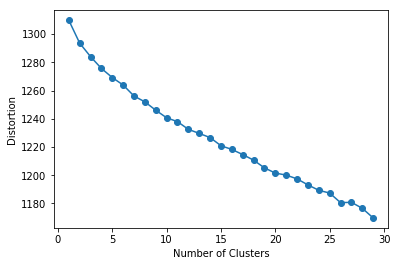

In [257]:
# Use the elbow method to see how many clusters kmeans is detecting
# Look at silhouette coefficients
distortions = []
for i in range(1, 30):
    km = KMeans(n_clusters=i,
                init='k-means++',
                random_state=3)
    km.fit(lyrics_norm)
    distortions.append(km.inertia_)
plt.plot(range(1, 30), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [258]:
# Doesn't look like there's much of a change in the distortion reduction around 15 clusters. KMeans may be 
# struggling to detect 10 distinct clusters.
# Let's take a look at the silhouette shapes.

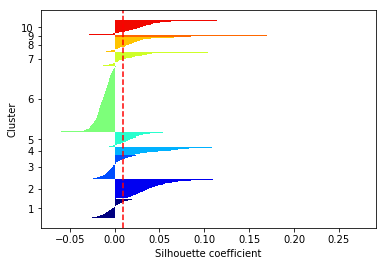

In [259]:
km = KMeans(n_clusters=10,
            init='k-means++',
            random_state=3)
y_km = km.fit_predict(lyrics_norm)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(lyrics_norm, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color='red',
            linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

#### Mean Shift

In [260]:
bandwidth = estimate_bandwidth(lyrics_norm, quantile=0.4)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(lyrics_norm)

labels = ms.labels_
cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels))
print('Number of estimated clusters: {}'.format(n_clusters_))

Number of estimated clusters: 1


In [261]:
# Mean Shift clearly not detecting distinct clusters

#### Spectral Clustering

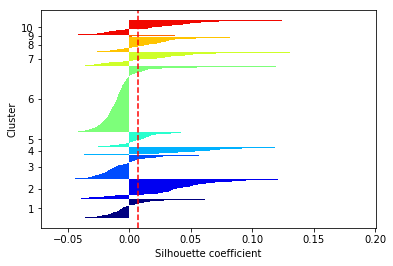

In [262]:
sc = SpectralClustering(n_clusters=10,
            random_state=3)
y_sc = sc.fit_predict(lyrics_norm)

cluster_labels = np.unique(y_sc)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(lyrics_norm, y_sc, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color='red',
            linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

In [263]:
# Spectral Clustering also appears to be struggling

### CountVectorizer

In [264]:
vect = CountVectorizer(max_df=0.7, min_df=20, stop_words='english')
X_dtm = vect.fit_transform(df_sub_train1.clean_text)
print('Number of features: {}'.format(X_dtm.get_shape()[1]))

Number of features: 627


In [265]:
len(vect.get_stop_words())
# Took out quite a few stop words

318

In [266]:
X_dtm_norm = normalize(X_dtm.toarray())

#### KMeans

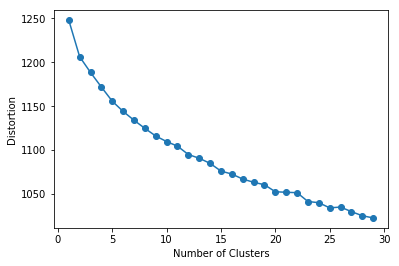

In [267]:
distortions = []
for i in range(1, 30):
    km = KMeans(n_clusters=i,
                init='k-means++',
                random_state=3)
    km.fit(X_dtm_norm)
    distortions.append(km.inertia_)
plt.plot(range(1, 30), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

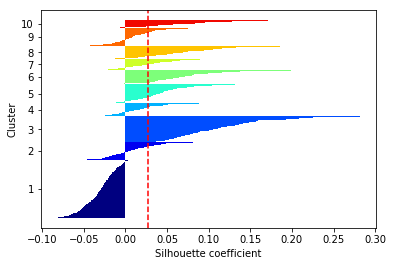

In [268]:
km = KMeans(n_clusters=10,
            init='k-means++',
            random_state=3)
y_km = km.fit_predict(X_dtm_norm)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_dtm_norm, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color='red',
            linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

#### Mean Shift

In [269]:
bandwidth = estimate_bandwidth(X_dtm_norm, quantile=0.1)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_dtm_norm)

labels = ms.labels_
cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels))
print('Number of estimated clusters: {}'.format(n_clusters_))

Number of estimated clusters: 1


#### Spectral Clustering

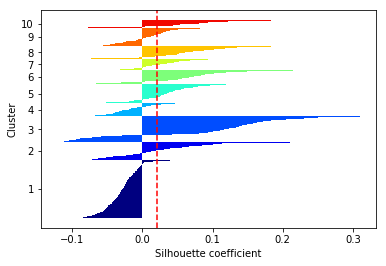

In [270]:
sc = SpectralClustering(n_clusters=10,
            random_state=3)
y_sc = sc.fit_predict(X_dtm_norm)

cluster_labels = np.unique(y_sc)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_dtm_norm, y_sc, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color='red',
            linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

### Stemmed CountVectorizer

In [271]:
import nltk.stem

In [272]:
english_stemmer = nltk.stem.SnowballStemmer('english')

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

In [273]:
vectorizer = StemmedCountVectorizer(min_df=10, max_df=.7, stop_words='english')

In [274]:
X_dtm2 = vectorizer.fit_transform(df_sub_train1.clean_text)
print('Number of features: {}'.format(X_dtm2.get_shape()[1]))

X_dtm_norm2 = normalize(X_dtm2.toarray())

Number of features: 1052


#### KMeans

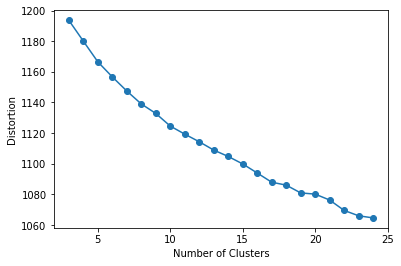

In [275]:
distortions = []
for i in range(3, 25):
    km = KMeans(n_clusters=i,
                init='k-means++',
                random_state=3)
    km.fit(X_dtm_norm2)
    distortions.append(km.inertia_)
plt.plot(range(3, 25), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

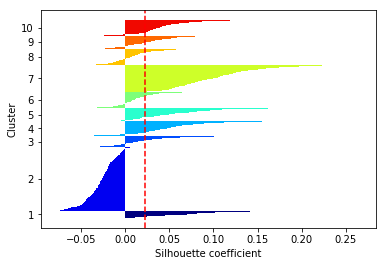

In [276]:
km = KMeans(n_clusters=10,
            init='k-means++',
            random_state=3)
y_km = km.fit_predict(X_dtm_norm2)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_dtm_norm2, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color='red',
            linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

In [277]:
# No better

### Dimensionality Reduction

In [278]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#### With TFIDF

In [279]:
vectorizer = TfidfVectorizer(max_df=0.5,
                             min_df=10,
                             stop_words='english',
                             lowercase=True,
                             use_idf=True,
                             norm=u'l2'
                             )

lyrics_tfidf = vectorizer.fit_transform(df_sub_train1.clean_text)
print('Number of features: {}'.format(lyrics_tfidf.get_shape()[1]))

lyrics_tfidf_csr = lyrics_tfidf.tocsr()
lyrics_norm = normalize(lyrics_tfidf_csr.toarray())

Number of features: 1143


In [280]:
svd = TruncatedSVD(200)
lsa = make_pipeline(svd, Normalizer(copy=False))

X_lsa = lsa.fit_transform(lyrics_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

Percent variance captured by all components: 58.539048778352786


##### KMeans

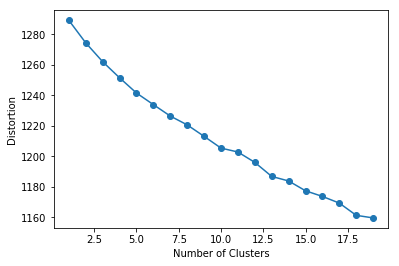

In [281]:
distortions = []
for i in range(1, 20):
    km = KMeans(n_clusters=i,
                init='k-means++',
                random_state=3)
    km.fit(X_lsa)
    distortions.append(km.inertia_)
plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

##### Mean Shift

In [282]:
bandwidth = estimate_bandwidth(X_lsa, quantile=0.6)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_lsa)

labels = ms.labels_
cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels))
print('Number of estimated clusters: {}'.format(n_clusters_))

Number of estimated clusters: 1


#### PCA with CountVect

In [283]:
vect = CountVectorizer(max_df=0.2, min_df=10, stop_words='english')
X_dtm = vect.fit_transform(df_sub_train1.clean_text)
print('Number of features: {}'.format(X_dtm.get_shape()[1]))

Number of features: 1121


In [284]:
svd = TruncatedSVD(200)
lsa = make_pipeline(svd, Normalizer(copy=False))

X_dtm_lsa = lsa.fit_transform(X_dtm)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

Percent variance captured by all components: 76.5566964987173


##### KMeans

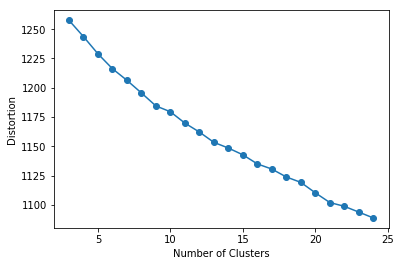

In [285]:
distortions = []
for i in range(3, 25):
    km = KMeans(n_clusters=i,
                init='k-means++',
                random_state=3)
    km.fit(X_dtm_lsa)
    distortions.append(km.inertia_)
plt.plot(range(3, 25), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

##### Mean Shift

In [286]:
bandwidth = estimate_bandwidth(X_dtm_lsa, quantile=0.01)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_dtm_lsa)

labels = ms.labels_
cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels))
print('Number of estimated clusters: {}'.format(n_clusters_))

Number of estimated clusters: 1


# Supervised Approach

In [287]:
df_sub_train1.head(3)

,artist,clean_text
3250,Cliff Richard,"Oh no, don't let go - all I need is a little m..."
36835,Indigo Girls,Anybody looking on they can see you're not so ...
27351,Cher,Long distance love affair Writer klaus meine T...


### RBM with Logistic Regression

In [288]:
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn import linear_model

In [289]:
lr = linear_model.LogisticRegression(random_state=3)
rbm = BernoulliRBM(random_state=3, verbose=False)

rbm_features_classifier = Pipeline(steps=[('rbm', rbm), ('logistic', lr)])

In [290]:
rbm.learning_rate = 0.3
rbm.n_iter = 10
rbm.n_components = 10

In [291]:
vectorizer = TfidfVectorizer(max_df=0.5, min_df=10, stop_words='english', lowercase=True, use_idf=True, norm=u'l2')

lyrics_tfidf = vectorizer.fit_transform(df_sub_train1.clean_text)
print('Number of features: {}'.format(lyrics_tfidf.get_shape()[1]))

lyrics_tfidf_csr = lyrics_tfidf.tocsr()
lyrics_norm = normalize(lyrics_tfidf_csr.toarray())

Number of features: 1143


In [292]:
print(lyrics_norm.shape)
print(df_sub_train1.shape)

(1391, 1143)
(1391, 2)


In [293]:
rbm_features_classifier.fit(lyrics_norm, df_sub_train1.artist)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('rbm', BernoulliRBM(batch_size=10, learning_rate=0.3, n_components=10, n_iter=10,
       random_state=3, verbose=False)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=3, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [294]:
rbm_features_classifier.score(lyrics_norm, df_sub_train1.artist)

0.15815959741193386

### LDA

In [213]:
df_sub_train1.head()

,artist,clean_text
3250,Cliff Richard,"Oh no, don't let go - all I need is a little m..."
36835,Indigo Girls,Anybody looking on they can see you're not so ...
27351,Cher,Long distance love affair Writer klaus meine T...
8462,Indigo Girls,You can go to the east to find your Your inner...
3898,Dean Martin,When love comes in and takes you for a spin Oo...


In [214]:
docs = np.array(df_sub_train1.clean_text)

In [215]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/matthewpokorny/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [295]:
# try different character lengths

In [ ]:
english_stemmer = nltk.stem.SnowballStemmer('english')

In [315]:
def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()

def docs_preprocessor(docs):
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(docs)):
        docs[idx] = str(docs[idx]).lower() # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx]) # Split into words.
        
    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isdigit()] for doc in docs]
    
    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 3] for doc in docs]
    
    # Lemmatize all words in documents.
#     lemmatizer = WordNetLemmatizer()
#     docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]

    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

  
    return docs

In [322]:
from nltk.stem.porter import PorterStemmer

In [323]:
def docs_preprocessor(docs):
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(docs)):
        docs[idx] = str(docs[idx]).lower() # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx]) # Split into words.
        
    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isdigit()] for doc in docs]
    
    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 3] for doc in docs]
    
    # Lemmatize all words in documents.
#     lemmatizer = WordNetLemmatizer()
#     docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
    
    # Get only stems
    p_stemmer = PorterStemmer()
    docs = [[p_stemmer.stem(i) for i in doc] for doc in docs]
    
    return docs

In [324]:
docs = docs_preprocessor(docs)

In [326]:
docs[5][:10]

['young',
 'marin',
 'head',
 'thinkin',
 'bout',
 'famili',
 'what',
 'there',
 'water',
 'wood']

In [306]:
from gensim.models.phrases import Phrases, Phraser

In [370]:
bigram = Phrases(docs)
len(bigram[docs[5]])

87

In [371]:
docs[5][:15]

['young',
 'marin',
 'head',
 'thinkin',
 'bout',
 'famili',
 'what',
 'there',
 'water',
 'wood',
 'sail',
 'feel',
 'good',
 'when',
 'shore']

In [372]:
for i in range(len(docs)):
    for token in bigram[docs[i]]:
        if '_' in token:
            docs[i].append(token)

In [ ]:
# Could start from here without including bi/trigrams

In [373]:
from gensim.corpora import Dictionary

In [374]:
dictionary = Dictionary(docs)
print('Number of unique words in initial documents:', len(dictionary))

Number of unique words in initial documents: 8117


In [375]:
# Filter out words that occur less than 5 documents or more than 20% of the documents.
dictionary.filter_extremes(no_below=5, no_above=0.2)
print('Number of unique words after removing rare and common words:', len(dictionary))

Number of unique words after removing rare and common words: 1919


In [376]:
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [377]:
corpus[0]  # bow count for every index - matches on the dictionary

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 3),
 (7, 3),
 (8, 3),
 (9, 9),
 (10, 3),
 (11, 1),
 (12, 1),
 (13, 9),
 (14, 6),
 (15, 1),
 (16, 1),
 (17, 6),
 (18, 6),
 (19, 1),
 (20, 1),
 (21, 6),
 (22, 1),
 (23, 1),
 (24, 3),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1)]

In [378]:
print('Number of unique tokens:', len(dictionary))

Number of unique tokens: 1919


In [379]:
print('Number of documents:', len(corpus))

Number of documents: 1391


In [380]:
from gensim.models import LdaModel

In [381]:
dictionary[0]

'after'

In [409]:
num_topics = 5
chunksize = 200
passes = 20
iterations = 400
eval_every = 1

# Make an index to word dictionary.
temp = dictionary[0]  # can ignore 
id2word = dictionary.id2token  # 

In [410]:
model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize,
                 alpha='auto', eta='auto',
                 iterations=iterations, num_topics=num_topics,
                 passes=passes, eval_every=eval_every)

In [411]:
top10 = model.print_topics(num_topics=5, num_words=2)
print(top10)

[(0, '0.057*"more_than" + 0.023*"than"'), (1, '0.032*"babi" + 0.019*"give"'), (2, '0.014*"home" + 0.014*"good"'), (3, '0.016*"onli" + 0.013*"think"'), (4, '0.019*"gonna" + 0.013*"rock_rol"')]


In [412]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [413]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [414]:
pyLDAvis.gensim.prepare(model, corpus, dictionary)

/usr/local/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.030472  0.046388       1        1  29.672012
3     -0.104239 -0.190443       2        1  25.306311
4     -0.032799  0.268509       3        1  17.268850
1     -0.140438 -0.063995       4        1  15.418085
0      0.307948 -0.060460       5        1  12.334742, topic_info=     Category        Freq                     Term       Total  loglift  \
term                                                                      
77    Default  706.000000                more_than  706.000000  30.0000   
31    Default  836.000000                     babi  836.000000  29.0000   
81    Default  297.000000                     than  297.000000  28.0000   
620   Default  240.000000              think_about  240.000000  27.0000   
649   Default  220.000000                yeah_yeah  220.000000  26.0000   
10    Default  609.000000                    gonna  609.000000  25.0000   
581   Default  231.000000                 rock_rol  231.000000  24.0000   
327   Default  291.000000                   believ  291.000000  23.0000   
17    Default  558.000000                     more  558.000000  22.0000   
399   Default  480.000000                     home  480.000000  21.0000   
188   Default  213.000000                     danc  213.000000  20.0000   
754   Default  165.000000              better_than  165.000000  19.0000   
47    Default  500.000000                     onli  500.000000  18.0000   
8     Default  531.000000                     give  531.000000  17.0000   
59    Default  193.000000                     burn  193.000000  16.0000   
1483  Default  166.000000               turn_light  166.000000  15.0000   
611   Default  175.000000               honky_tonk  175.000000  14.0000   
241   Default  372.000000                     yeah  372.000000  13.0000   
79    Default  173.000000                     rock  173.000000  12.0000   
757   Default  142.000000                 each_oth  142.000000  11.0000   
203   Default  201.000000                    wanna  201.000000  10.0000   
306   Default  299.000000                     song  299.000000   9.0000   
124   Default  521.000000                    think  521.000000   8.0000   
195   Default  290.000000                   realli  290.000000   7.0000   
443   Default  146.000000               should_hav  146.000000   6.0000   
583   Default  192.000000                     roll  192.000000   5.0000   
1241  Default  227.000000                 come_hom  227.000000   4.0000   
137   Default  145.000000               hold_tight  145.000000   3.0000   
50    Default  213.000000                    pleas  213.000000   2.0000   
136   Default  337.000000                     hold  337.000000   1.0000   
...       ...         ...                      ...         ...      ...   
1556   Topic5   83.839752                shot_down   84.631180   2.0834   
1101   Topic5   79.409348                fade_away   80.207466   2.0827   
1076   Topic5   78.325302               bring_back   79.122711   2.0826   
1178   Topic5   76.650513               friend_min   77.461899   2.0822   
674    Topic5   75.225288               late_night   76.022736   2.0822   
1331   Topic5   66.227646               tell_stori   67.020668   2.0808   
793    Topic5   64.069374              make_mistak   64.864990   2.0804   
1459   Topic5   60.329231                     mile   61.137543   2.0794   
1896   Topic5   58.524761                turn_turn   59.336166   2.0790   
982    Topic5   57.186512              coming_back   57.986488   2.0789   
380    Topic5   56.539837                 midnight   57.346565   2.0786   
1835   Topic5   53.828083                wide_open   54.628513   2.0780   
1498   Topic5   55.068653                     bird   55.893143   2.0779   
690    Topic5   53.585190                 play_gam   54.387638   2.0779   
996    Topic5   52.635345  think_about_think_about   5